In [1]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


/tmp/job.11874308/ipykernel_64434/3391910190.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob("*.cali"))

(2/2) Creating Thicket: 100%|██████████| 252/252 [00:07<00:00, 33.13it/s]


In [4]:
# Convert the metadata columns 'input_size' and 'num_procs' to performance data, forcing an overwrite
tk.metadata_column_to_perfdata("input_size", overwrite=True)
tk.metadata_column_to_perfdata("num_procs", overwrite=True)
tk.metadata_column_to_perfdata("input_type", overwrite=True)


In [5]:
# Reset the index if 'input_size', 'num_procs', or 'input_type' are part of it
if 'input_size' in tk.dataframe.index.names or 'num_procs' in tk.dataframe.index.names or 'input_type' in tk.dataframe.index.names:
    tk.dataframe = tk.dataframe.reset_index()

# Convert the metadata columns 'input_size', 'num_procs', and 'input_type' to performance data, forcing an overwrite
tk.metadata_column_to_perfdata("input_size", overwrite=True)
tk.metadata_column_to_perfdata("num_procs", overwrite=True)
tk.metadata_column_to_perfdata("input_type", overwrite=True)

# Set the necessary index back for easier access (optional depending on your needs)
tk.dataframe = tk.dataframe.set_index(["input_size", "num_procs", "input_type"]).sort_index()

# Confirm the changes by displaying the first few rows
print(tk.dataframe.head())


                                    nid   spot.channel  Min time/rank  \
input_size num_procs input_type                                         
65536      2         1%_perturbed   1.0  regionprofile       0.602193   
                     1%_perturbed  13.0  regionprofile       0.000133   
                     1%_perturbed  10.0  regionprofile       0.000004   
                     1%_perturbed  12.0  regionprofile       0.000004   
                     1%_perturbed   2.0  regionprofile       0.000041   

                                   Max time/rank  Avg time/rank  Total time  \
input_size num_procs input_type                                               
65536      2         1%_perturbed       0.603391       0.602792    1.205584   
                     1%_perturbed       0.078250       0.039192    0.078384   
                     1%_perturbed       0.000005       0.000005    0.000009   
                     1%_perturbed       0.000005       0.000005    0.000010   
              

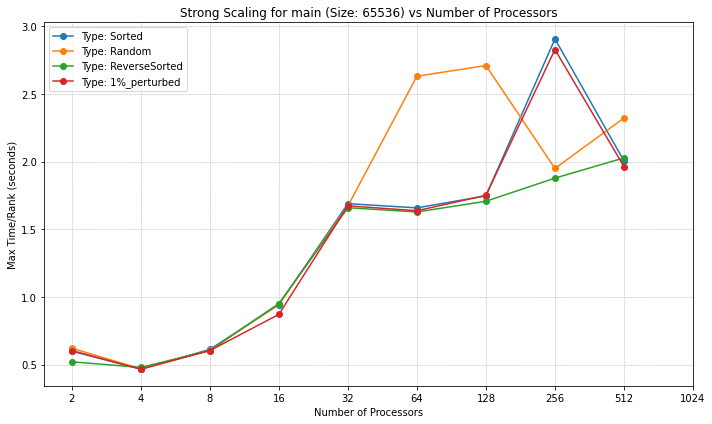

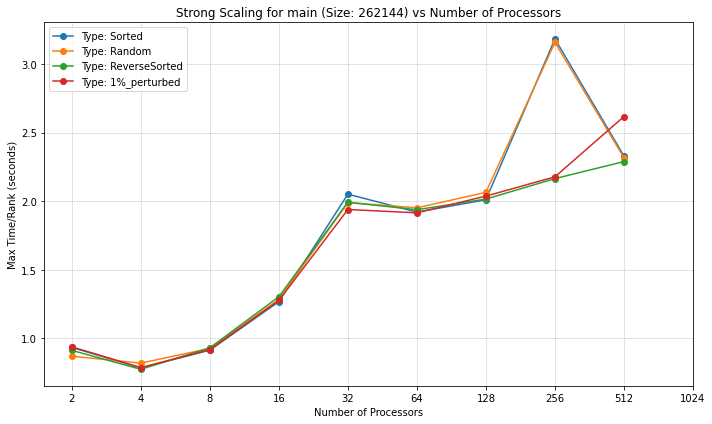

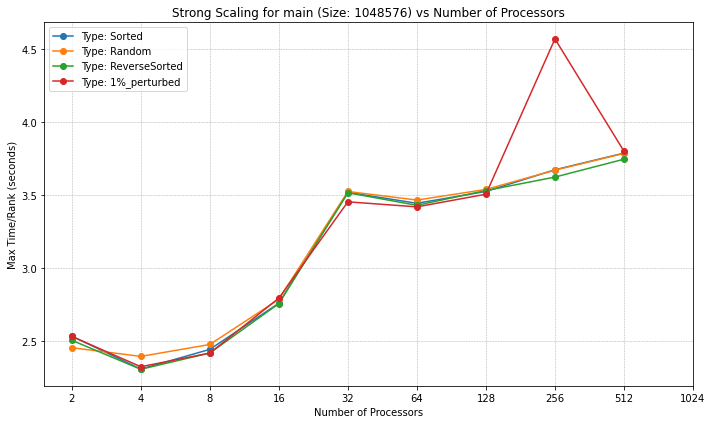

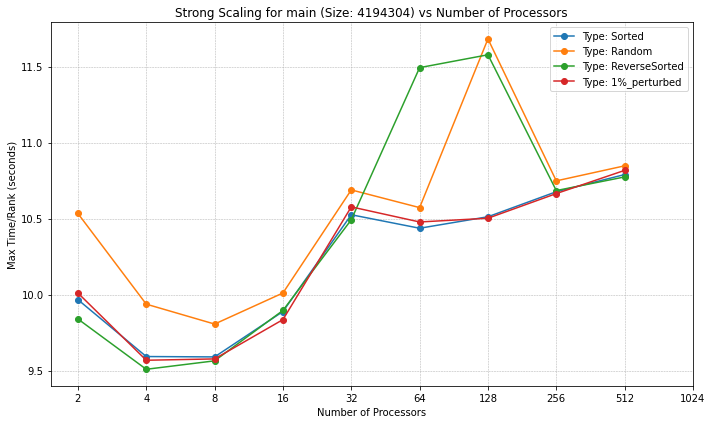

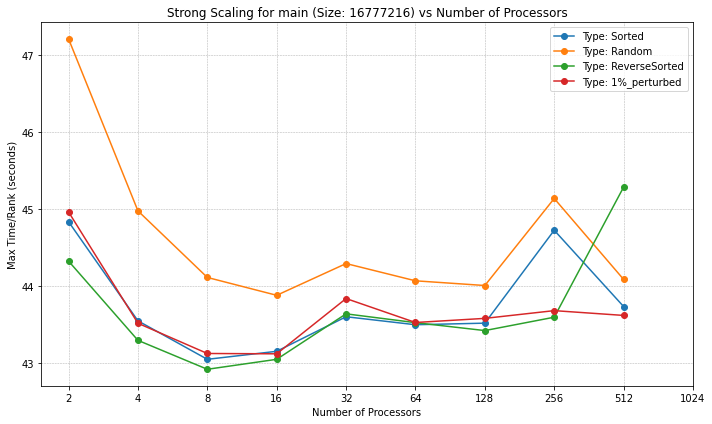

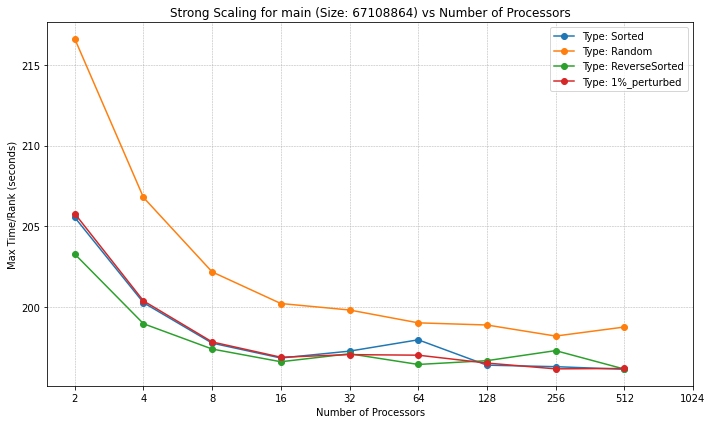

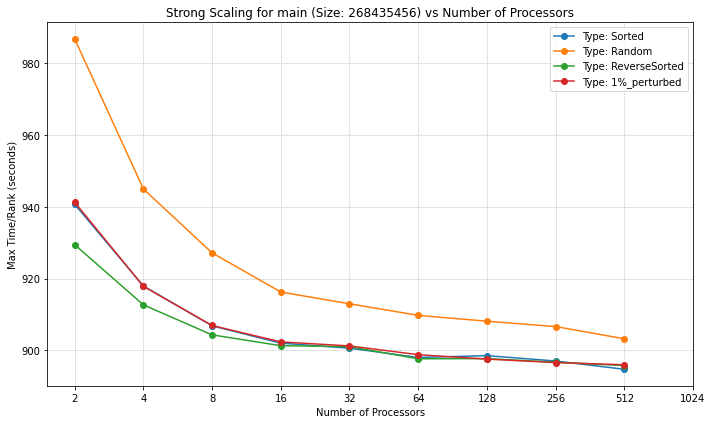

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define the strong scaling plot function
def plot_strong_scaling(df, phase, input_sizes, input_types):
    # Define x-axis tick positions (base-2 progression)
    x_ticks = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
    
    for input_size in input_sizes:
        plt.figure(figsize=(10, 6))
        
        # Loop through each input type to plot the data for the current input_size
        for input_type in input_types:
            # Filter the dataframe based on input_size, input_type, and phase
            subset = df[(df.index.get_level_values('input_size') == input_size) &
                        (df.index.get_level_values('input_type') == input_type) &
                        (df['name'] == phase)]
            
            # Plot the Max time/rank for each num_procs (or processors)
            plt.plot(subset.index.get_level_values('num_procs'), subset['Max time/rank'], 
                     label=f"Type: {input_type}", marker='o')
        
        # Set x-axis to a logarithmic scale for even spacing
        plt.xscale('log', base=2)
        
        # Set x-axis tick positions and format them to show actual values
        plt.xticks(x_ticks)  # Set the positions
        plt.gca().get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))
        
        # Labels, title, and grid
        plt.xlabel('Number of Processors')
        plt.ylabel('Max Time/Rank (seconds)')
        plt.title(f"Strong Scaling for {phase} (Size: {input_size}) vs Number of Processors")
        plt.legend()
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.tight_layout()
        #save file
        plt.savefig(f"strong_scaling_{input_size}_{phase}.png")
        plt.show()

# Example input sizes and types
input_sizes = tk.dataframe.index.get_level_values('input_size').unique()  # Get unique input sizes from the index
input_types = ['Sorted', 'Random', 'ReverseSorted', '1%_perturbed']

# Call the function for comp_large phase, which will generate 7 graphs, one per input size
plot_strong_scaling(tk.dataframe, 'main', input_sizes, input_types)



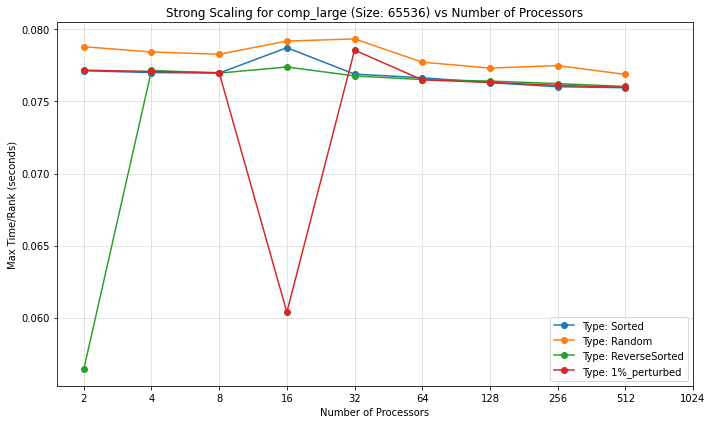

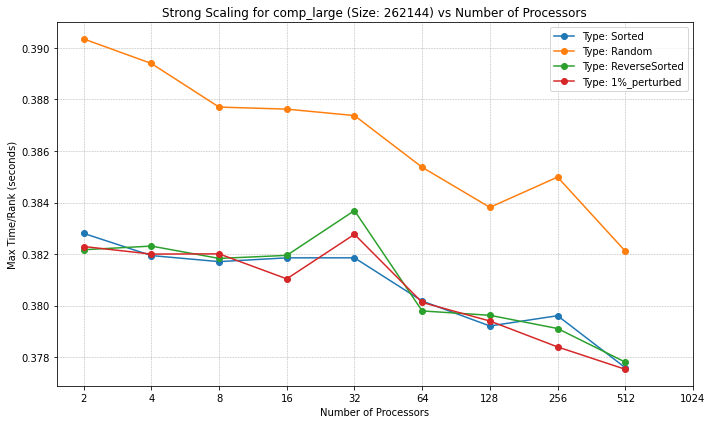

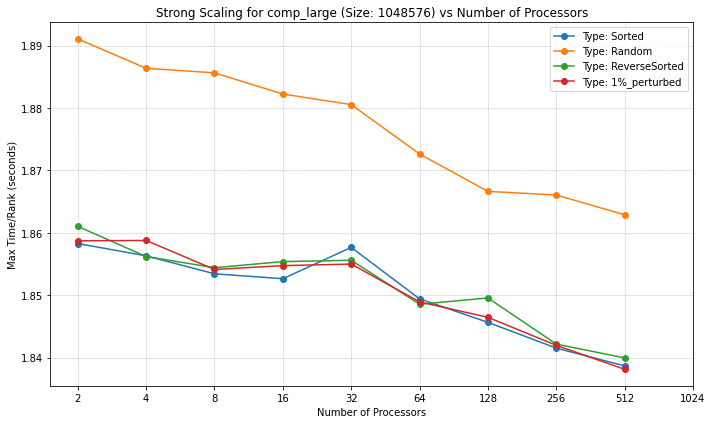

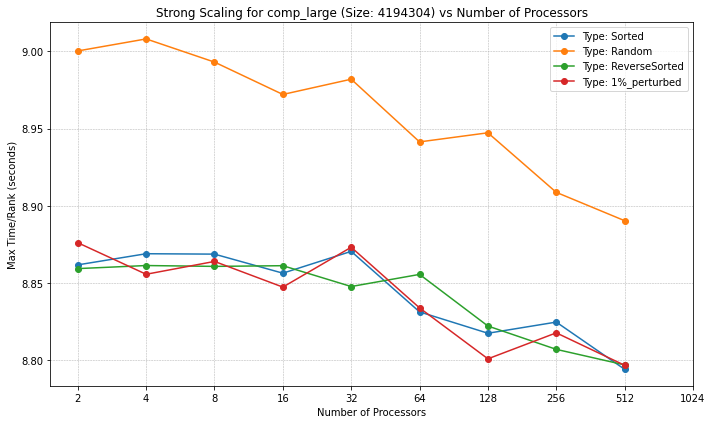

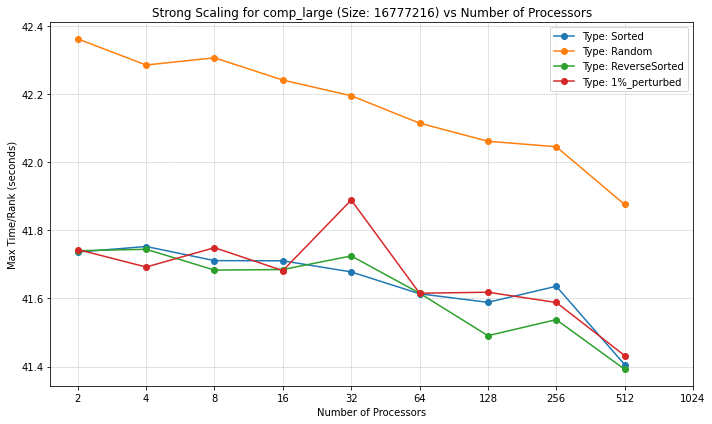

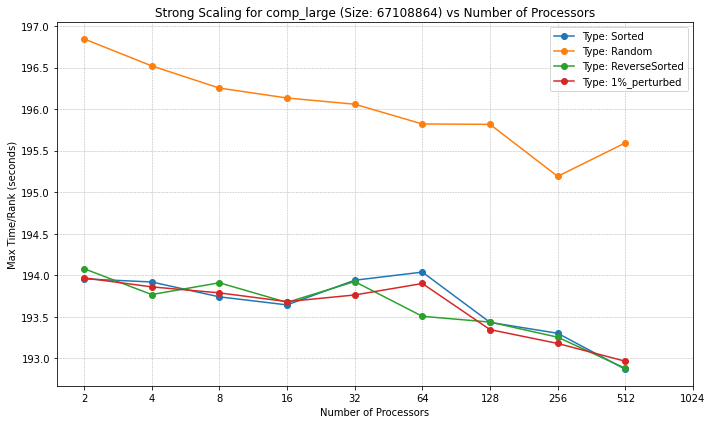

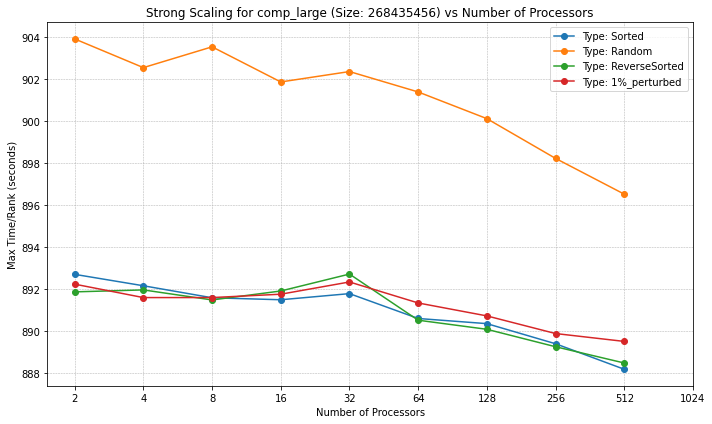

In [7]:
plot_strong_scaling(tk.dataframe, 'comp_large', input_sizes, input_types)

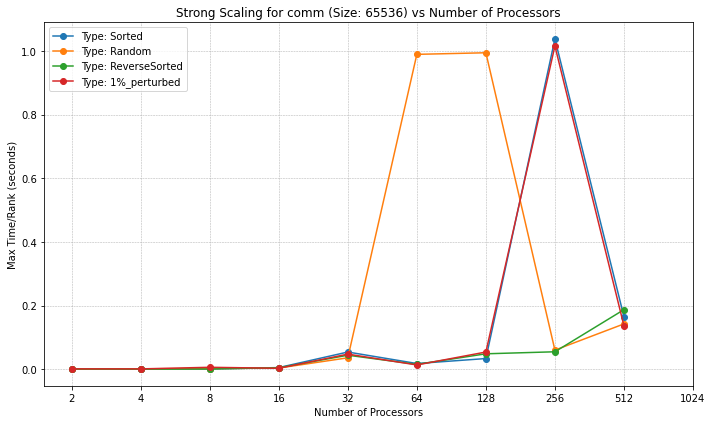

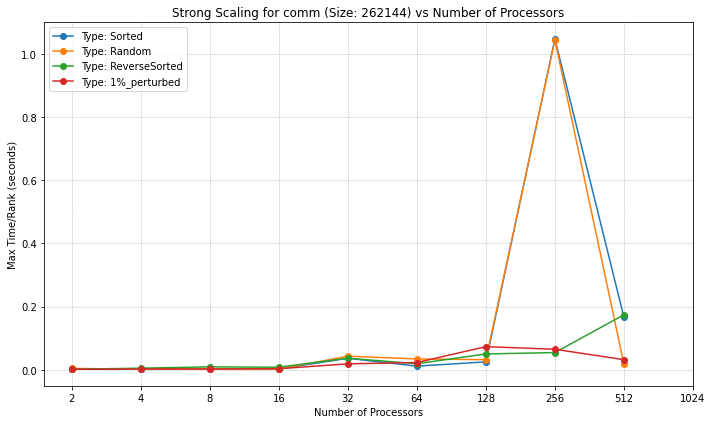

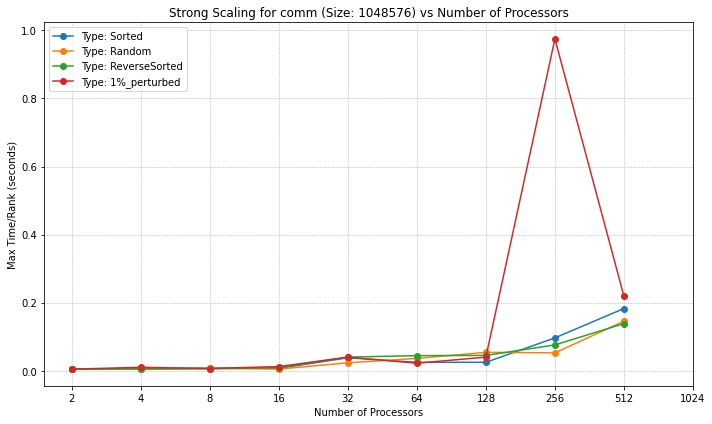

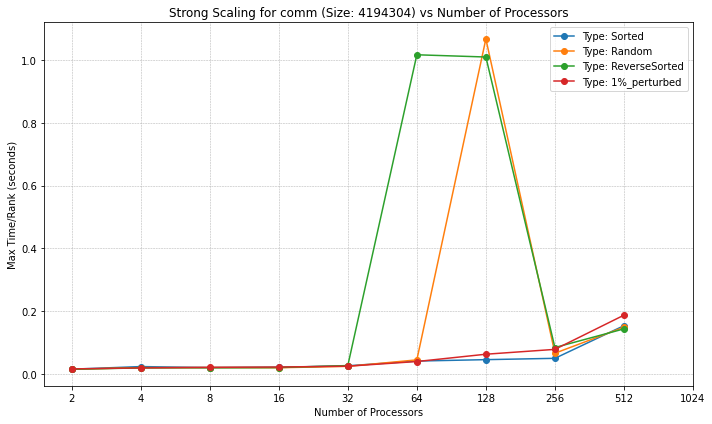

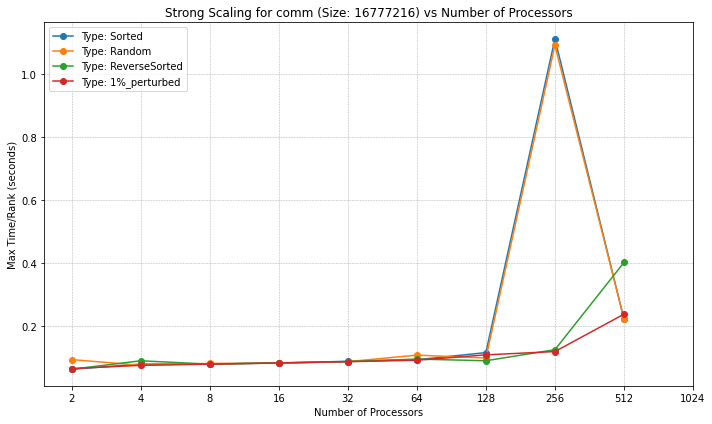

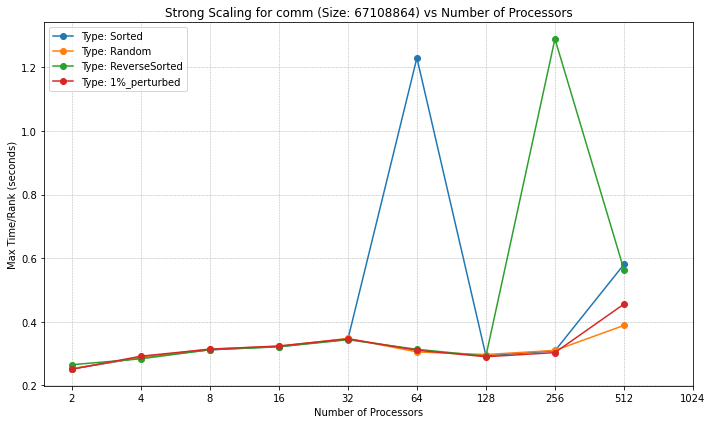

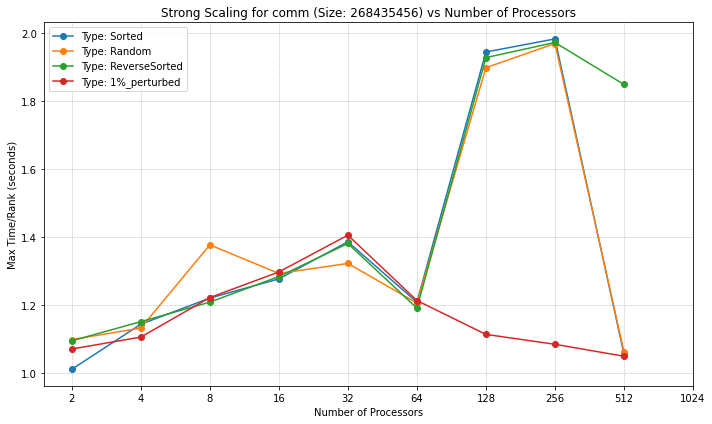

In [27]:
plot_strong_scaling(tk.dataframe, 'comm', input_sizes, input_types)

plot_strong_scaling(tk.dataframe, 'comm', input_sizes, input_types)

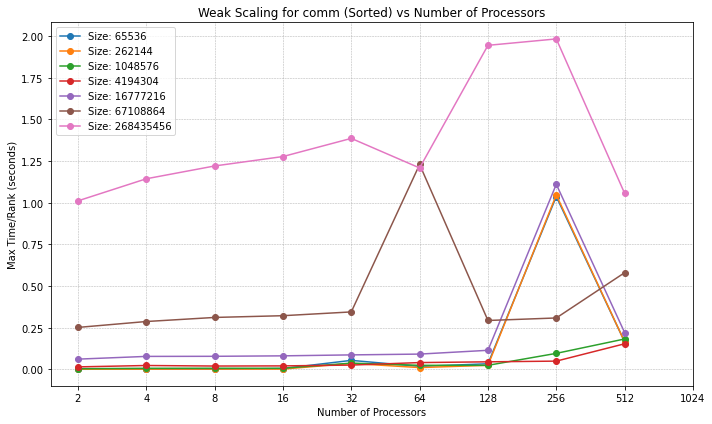

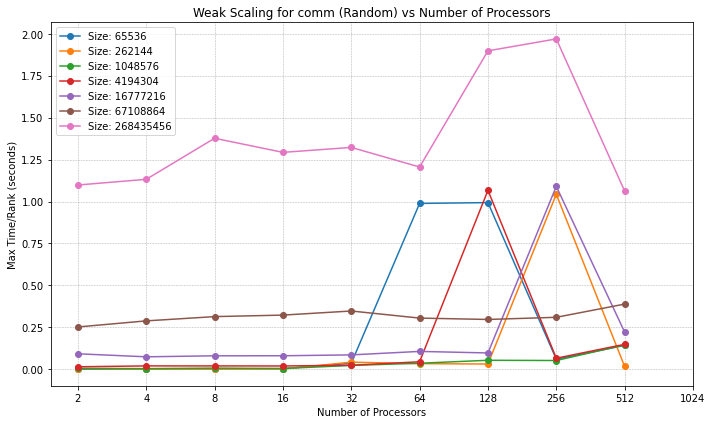

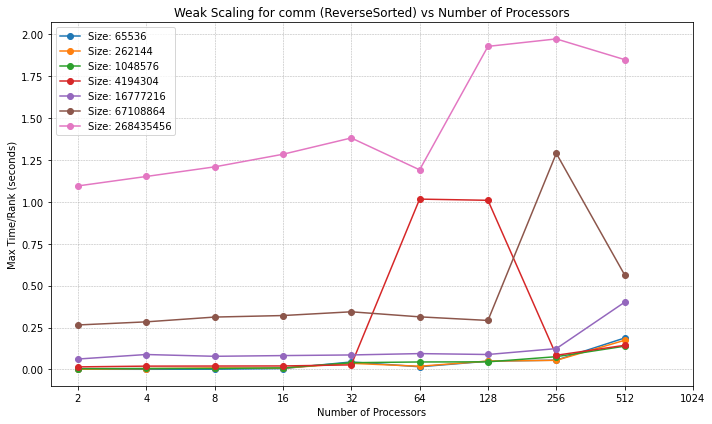

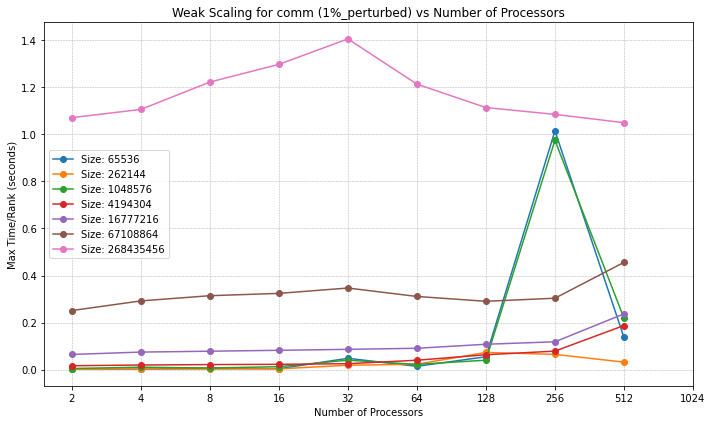

In [9]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define the weak scaling plot function
def plot_weak_scaling(df, phase, input_types, input_sizes):
    # Define x-axis tick positions (powers of 2)
    x_ticks = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
    
    for input_type in input_types:
        plt.figure(figsize=(10, 6))
        
        # Loop through each input size to plot the data for the current input type
        for input_size in input_sizes:
            # Filter the dataframe based on input_size, input_type, and phase
            subset = df[(df.index.get_level_values('input_size') == input_size) &
                        (df.index.get_level_values('input_type') == input_type) &
                        (df['name'] == phase)]
            
            # Plot the Max time/rank for each num_procs (or processors)
            plt.plot(subset.index.get_level_values('num_procs'), subset['Max time/rank'], 
                     label=f"Size: {input_size}", marker='o')
        
        # Set x-axis to logarithmic scale for even spacing
        plt.xscale('log', base=2)
        
        # Set x-axis tick positions and format them to show actual values
        plt.xticks(x_ticks)
        plt.gca().get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))
        
        # Labels, title, and grid
        plt.xlabel('Number of Processors')
        plt.ylabel('Max Time/Rank (seconds)')
        plt.title(f"Weak Scaling for {phase} ({input_type}) vs Number of Processors")
        plt.legend()
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Consistent grid style
        plt.tight_layout()
        plt.savefig(f"weak_scaling_{input_type}_{phase}.png")
        plt.show()

# Example input types and sizes
input_types = ['Sorted', 'Random', 'ReverseSorted', '1%_perturbed']
input_sizes = tk.dataframe.index.get_level_values('input_size').unique()  # Example input sizes

# Call the function for the specified phase
plot_weak_scaling(tk.dataframe, 'comm', input_types, input_sizes)


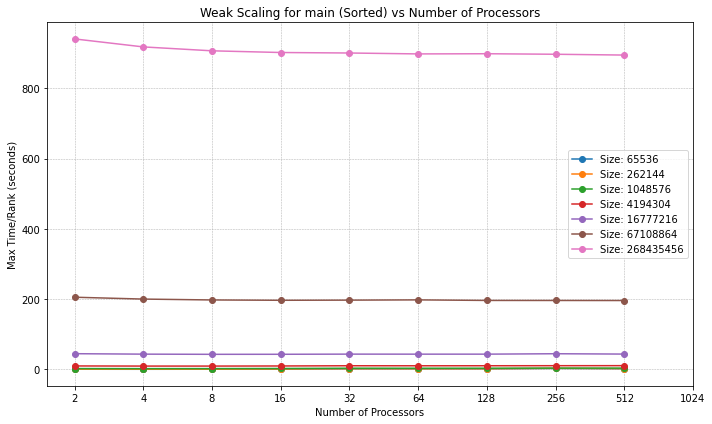

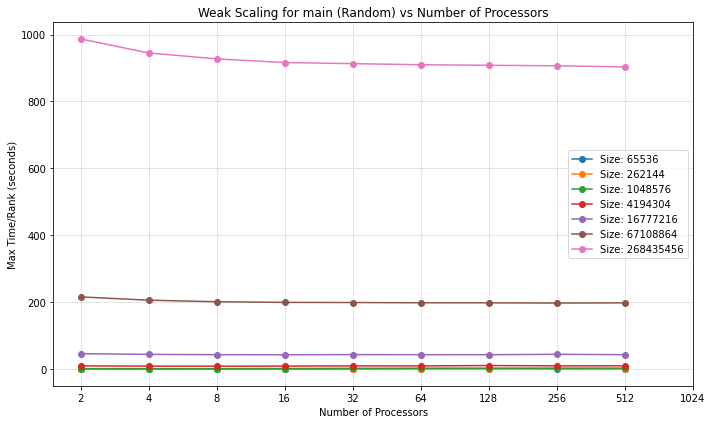

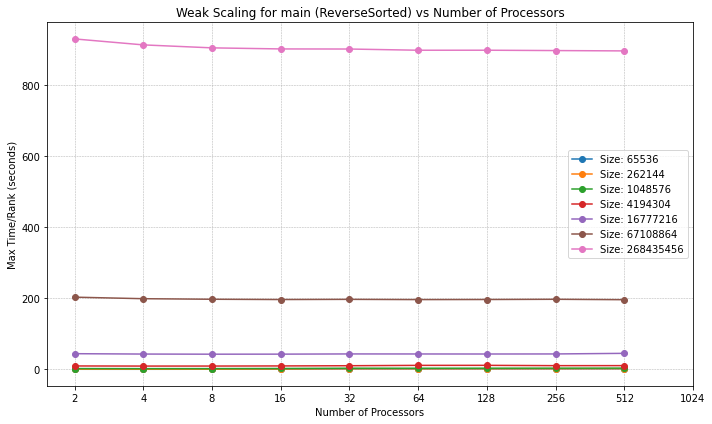

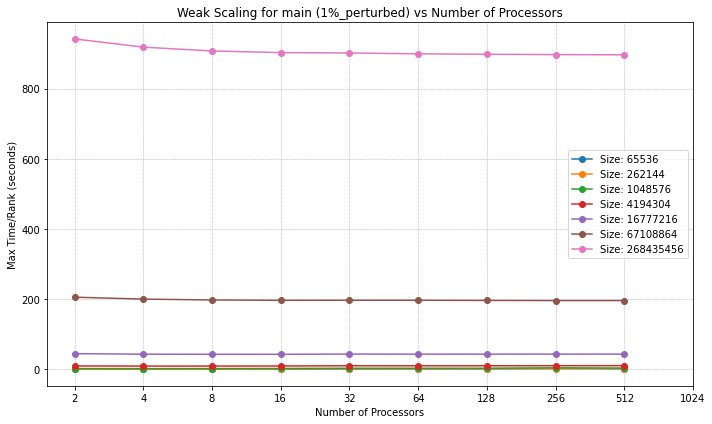

In [10]:
plot_weak_scaling(tk.dataframe, 'main', input_types, input_sizes)

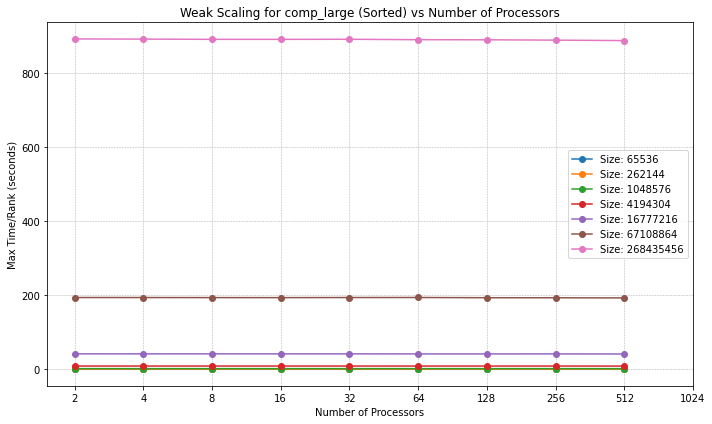

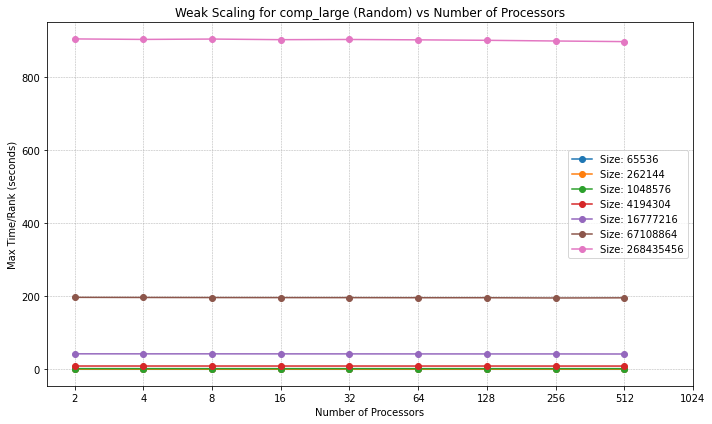

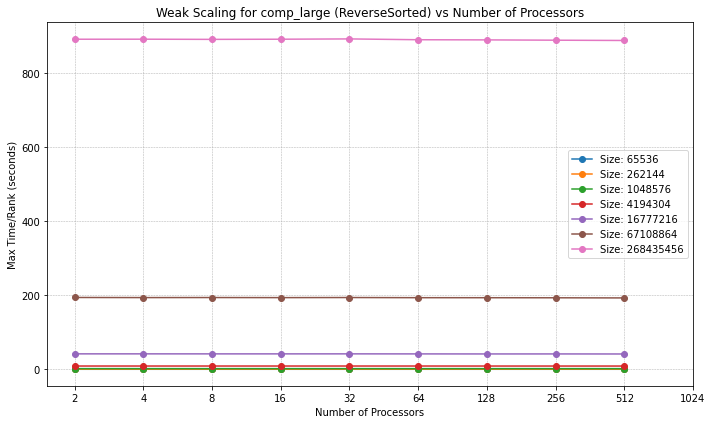

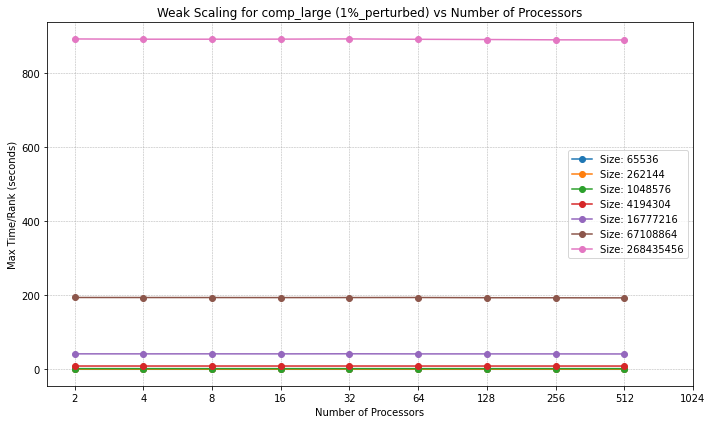

In [11]:
plot_weak_scaling(tk.dataframe, 'comp_large', input_types, input_sizes)

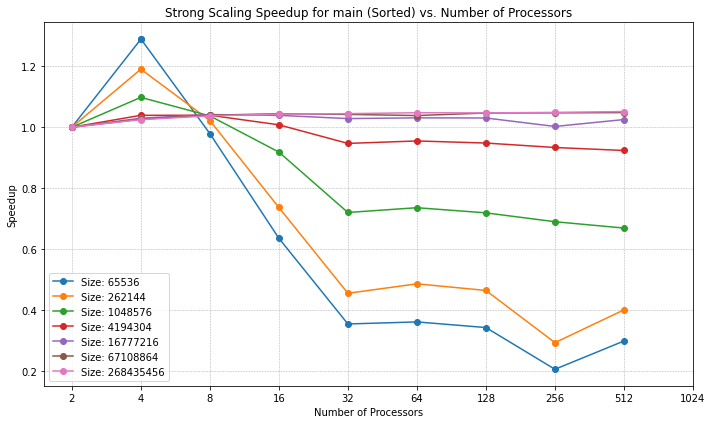

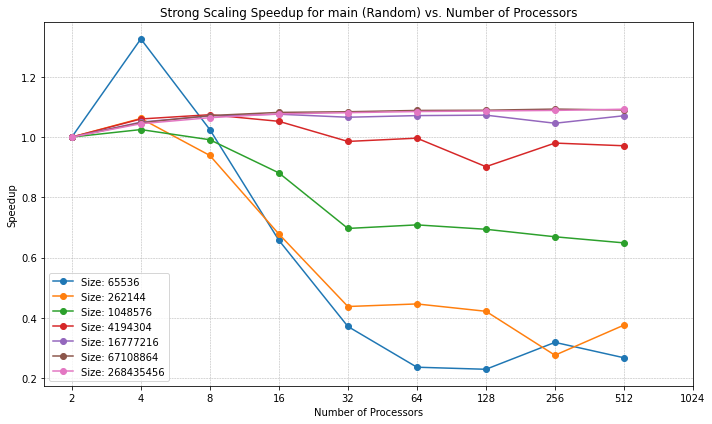

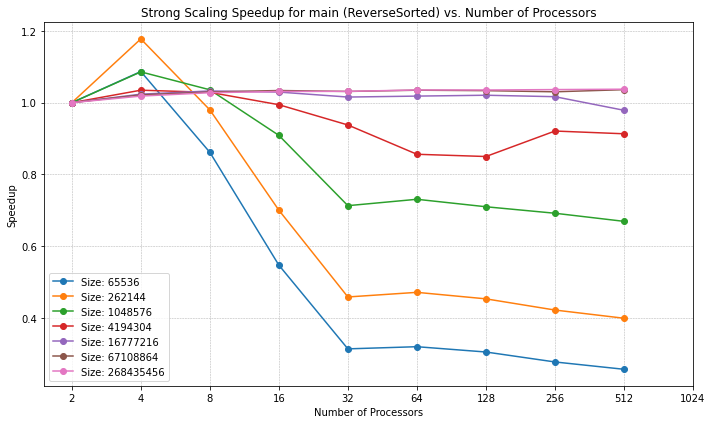

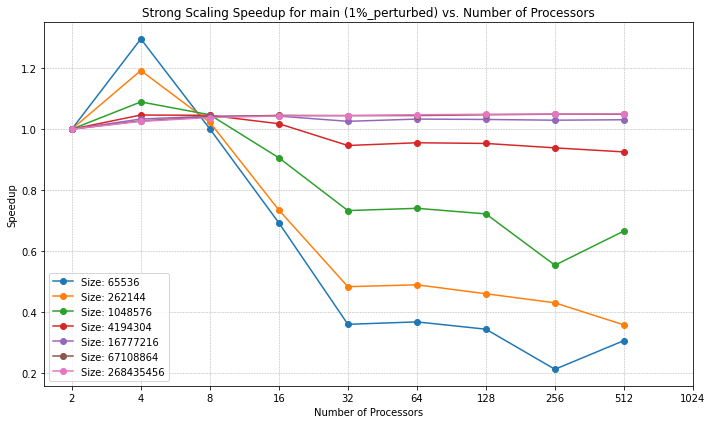

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define the strong scaling speedup plot function
def plot_strong_scaling_speedup(df, phase, input_types):
    # Define x-axis tick positions (powers of 2 for even spacing)
    x_ticks = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
    
    # Loop through each input type to create a separate graph
    for input_type in input_types:
        plt.figure(figsize=(10, 6))
        
        # Loop through each input size and calculate speedup
        for input_size in df.index.get_level_values('input_size').unique():
            # Filter the dataframe based on input_size, input_type, and phase
            subset = df[(df.index.get_level_values('input_type') == input_type) &
                        (df.index.get_level_values('input_size') == input_size) &
                        (df['name'] == phase)]
            
            # Calculate the speedup based on the Max time for 2 processors (num_procs == 2)
            base_time = subset[subset.index.get_level_values('num_procs') == 2]['Max time/rank'].values[0]
            speedup = base_time / subset['Max time/rank']
            
            # Plot the speedup for each input_size
            plt.plot(subset.index.get_level_values('num_procs'), speedup, 
                     label=f"Size: {input_size}", marker='o')
        
        # Set x-axis to a logarithmic scale for even spacing
        plt.xscale('log', base=2)
        
        # Set x-axis tick positions and format them to show actual values
        plt.xticks(x_ticks)
        plt.gca().get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))
        
        # Labels, title, and grid
        plt.xlabel('Number of Processors')
        plt.ylabel('Speedup')
        plt.title(f"Strong Scaling Speedup for {phase} ({input_type}) vs. Number of Processors")
        plt.legend()
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Consistent grid style
        plt.tight_layout()
        plt.savefig(f"speedup_{input_type}_{phase}.png")
        plt.show()

# Define input types
input_types = ['Sorted', 'Random', 'ReverseSorted', '1%_perturbed']

# Example call to the function
plot_strong_scaling_speedup(tk.dataframe, 'main', input_types)


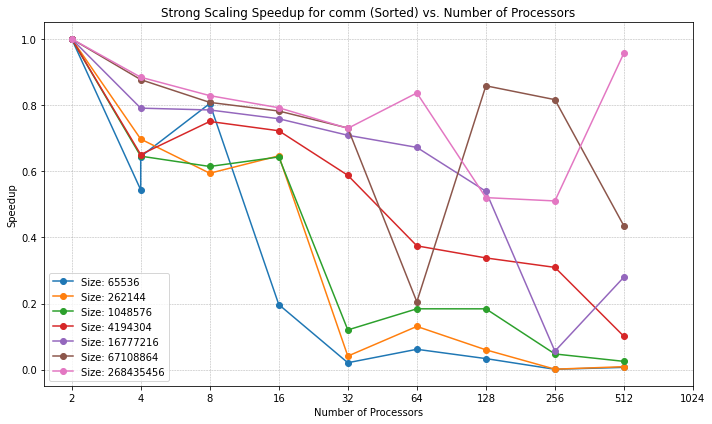

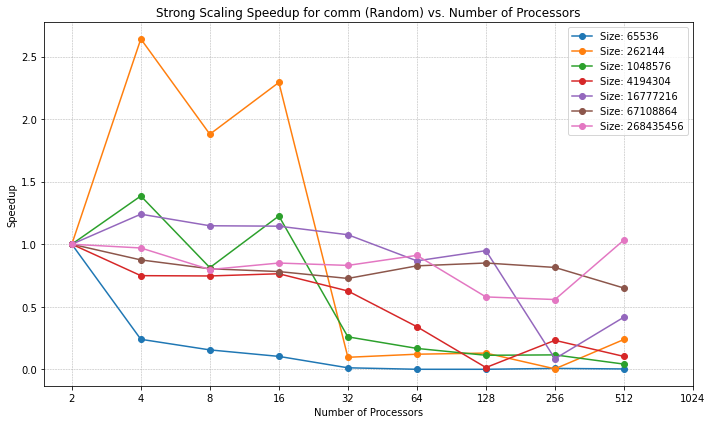

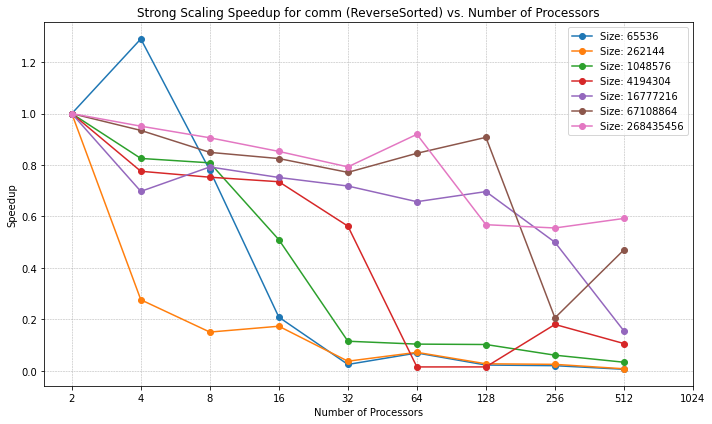

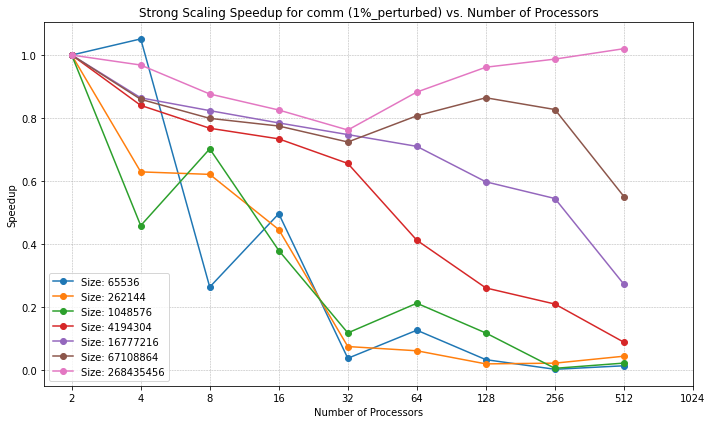

In [13]:
plot_strong_scaling_speedup(tk.dataframe, 'comm', input_types)

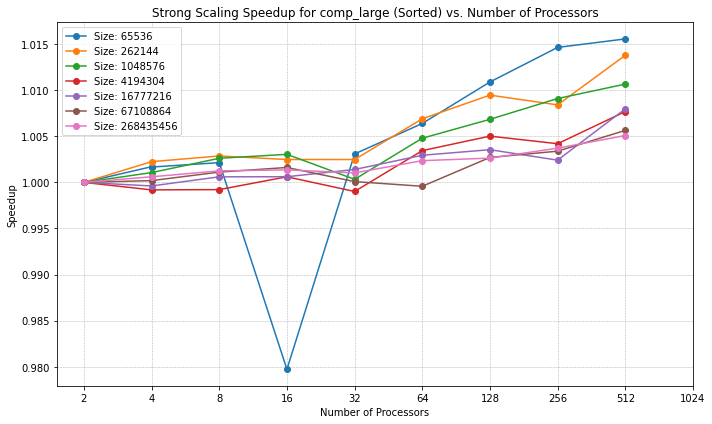

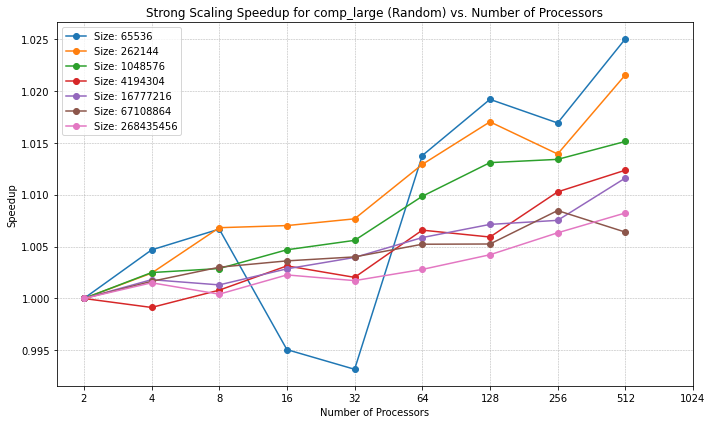

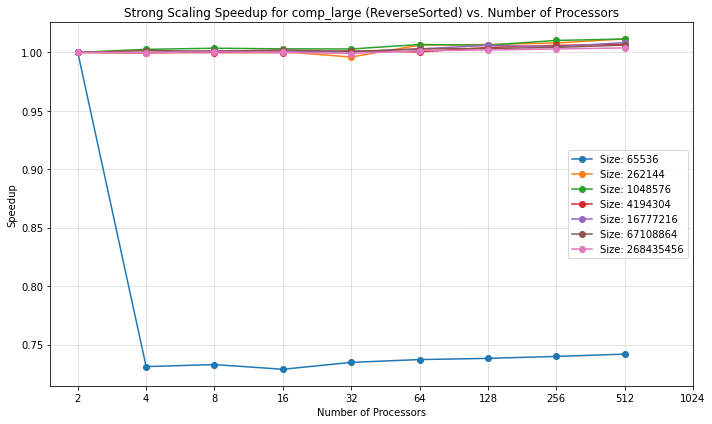

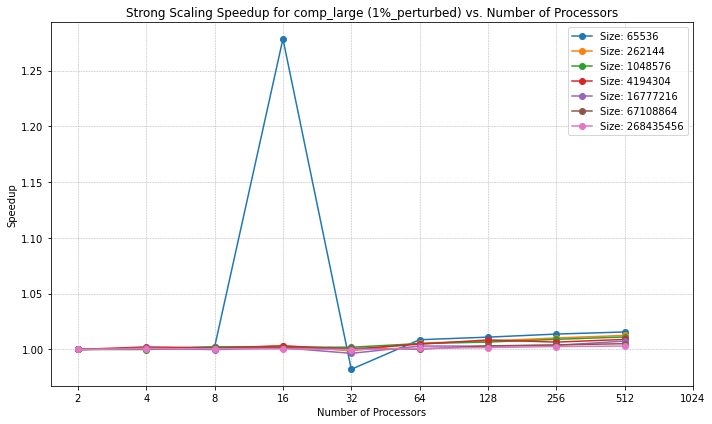

In [14]:
plot_strong_scaling_speedup(tk.dataframe, 'comp_large', input_types)

In [15]:
import pandas as pd

def display_strong_scaling_speedup_values(df, phase, input_types):
    # Define x-axis tick positions (powers of 2 for even spacing)
    x_ticks = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
    
    # Loop through each input type to display speedup data
    for input_type in input_types:
        print(f"\n--- Strong Scaling Speedup Data for Phase: {phase}, Input Type: {input_type} ---")
        
        # Loop through each input size and calculate speedup
        for input_size in df.index.get_level_values('input_size').unique():
            # Filter the dataframe based on input_size, input_type, and phase
            subset = df[(df.index.get_level_values('input_type') == input_type) &
                        (df.index.get_level_values('input_size') == input_size) &
                        (df['name'] == phase)]
            
            # Check if num_procs == 2 exists and calculate speedup based on that
            if not subset[subset.index.get_level_values('num_procs') == 2].empty:
                base_time = subset[subset.index.get_level_values('num_procs') == 2]['Max time/rank'].values[0]
                speedup = base_time / subset['Max time/rank']
                
                # Create a DataFrame to display the values for each num_procs
                speedup_data = pd.DataFrame({
                    'num_procs': subset.index.get_level_values('num_procs'),
                    'Max time/rank': subset['Max time/rank'],
                    'Speedup': speedup
                })
                
                # Print the speedup data for this input size
                print(f"\nInput Size: {input_size}")
                print(speedup_data.to_string(index=False))
            else:
                print(f"No data found for num_procs == 2 for input size {input_size} and input type {input_type}")

# Define input types
input_types = ['Sorted', 'Random', 'ReverseSorted', '1%_perturbed']

# Example call to the function
display_strong_scaling_speedup_values(tk.dataframe, 'main', input_types)



--- Strong Scaling Speedup Data for Phase: main, Input Type: Sorted ---

Input Size: 65536
 num_procs  Max time/rank  Speedup
         2       0.599405 1.000000
         4       0.465189 1.288519
         4       0.464805 1.289584
         8       0.612163 0.979159
        16       0.942753 0.635803
        32       1.689818 0.354716
        64       1.658341 0.361449
       128       1.747442 0.343019
       256       2.908035 0.206120
       512       2.005636 0.298860

Input Size: 262144
 num_procs  Max time/rank  Speedup
         2       0.934086 1.000000
         4       0.784761 1.190281
         8       0.914058 1.021911
        16       1.267764 0.736798
        32       2.051144 0.455398
        64       1.920470 0.486384
       128       2.010207 0.464672
       256       3.182576 0.293500
       512       2.329357 0.401006

Input Size: 1048576
 num_procs  Max time/rank  Speedup
         2       2.533981 1.000000
         4       2.308077 1.097875
         8       2.443155 1

In [16]:
import pandas as pd

def display_total_time_values(df, phase, input_sizes, input_types):
    # Loop through each input type to display Total time data
    for input_type in input_types:
        print(f"\n--- Total Time Data for Phase: {phase}, Input Type: {input_type} ---")
        
        # Loop through each input size to display Total time values
        for input_size in input_sizes:
            # Filter the dataframe based on input_size, input_type, and phase
            subset = df[(df.index.get_level_values('input_size') == input_size) &
                        (df.index.get_level_values('input_type') == input_type) &
                        (df['name'] == phase)]
            
            # Display Total time values for each num_procs if data is available
            if not subset.empty:
                print(f"\nInput Size: {input_size}")
                total_time_data = pd.DataFrame({
                    'num_procs': subset.index.get_level_values('num_procs'),
                    'Total time': subset['Total time']
                })
                print(total_time_data.to_string(index=False))
            else:
                print(f"No data found for input size {input_size} and input type {input_type}")

# Define example input sizes and types
input_sizes = tk.dataframe.index.get_level_values('input_size').unique()  # Ensure unique input sizes
input_types = ['Sorted', 'Random', 'ReverseSorted', '1%_perturbed']

# Example call to the function
display_total_time_values(tk.dataframe, 'main', input_sizes, input_types)



--- Total Time Data for Phase: main, Input Type: Sorted ---

Input Size: 65536
 num_procs  Total time
         2    1.197046
         4    1.858994
         4    1.859005
         8    4.892585
        16   15.067478
        32   53.961101
        64  105.932172
       128  222.848507
       256  738.759887
       512 1016.710858

Input Size: 262144
 num_procs  Total time
         2    1.868136
         4    3.137116
         8    7.311965
        16   20.247082
        32   65.526753
        64  122.610470
       128  255.666600
       256  812.811506
       512 1183.403897

Input Size: 1048576
 num_procs  Total time
         2    5.067568
         4    9.231076
         8   19.520889
        16   44.120757
        32  112.269429
        64  220.021354
       128  450.278857
       256  937.577728
       512 1923.980508

Input Size: 4194304
 num_procs  Total time
         2   19.932402
         4   38.364677
         8   76.712413
        16  158.199807
        32  336.695441
       

In [17]:
import pandas as pd

def display_weak_scaling_values(df, phase, input_types, input_sizes):
    # Loop through each input type to display weak scaling data
    for input_type in input_types:
        print(f"\n--- Weak Scaling Data for Phase: {phase}, Input Type: {input_type} ---")
        
        # Loop through each input size to display Max time/rank values
        for input_size in input_sizes:
            # Filter the dataframe based on input_size, input_type, and phase
            subset = df[(df.index.get_level_values('input_size') == input_size) &
                        (df.index.get_level_values('input_type') == input_type) &
                        (df['name'] == phase)]
            
            # Display Max time/rank values for each num_procs if data is available
            if not subset.empty:
                print(f"\nInput Size: {input_size}")
                weak_scaling_data = pd.DataFrame({
                    'num_procs': subset.index.get_level_values('num_procs'),
                    'Max time/rank': subset['Max time/rank']
                })
                print(weak_scaling_data.to_string(index=False))
            else:
                print(f"No data found for input size {input_size} and input type {input_type}")

# Define example input types and sizes
input_types = ['Sorted', 'Random', 'ReverseSorted', '1%_perturbed']
input_sizes = tk.dataframe.index.get_level_values('input_size').unique()  # Ensure unique input sizes

# Example call to display weak scaling data
display_weak_scaling_values(tk.dataframe, 'comm', input_types, input_sizes)



--- Weak Scaling Data for Phase: comm, Input Type: Sorted ---

Input Size: 65536
 num_procs  Max time/rank
         2       0.001141
         4       0.002099
         4       0.001771
         8       0.001418
        16       0.005798
        32       0.054600
        64       0.018544
       128       0.034129
       256       1.037205
       512       0.165636

Input Size: 262144
 num_procs  Max time/rank
         2       0.001487
         4       0.002133
         8       0.002504
        16       0.002300
        32       0.036263
        64       0.011378
       128       0.024830
       256       1.047039
       512       0.166032

Input Size: 1048576
 num_procs  Max time/rank
         2       0.004578
         4       0.007092
         8       0.007452
        16       0.007119
        32       0.038132
        64       0.024887
       128       0.024898
       256       0.096579
       512       0.182897

Input Size: 4194304
 num_procs  Max time/rank
         2       0.01549

In [19]:
tk.dataframe


nid   spot.channel  Min time/rank  \
input_size num_procs input_type                                          
65536      2         1%_perturbed    1.0  regionprofile       0.602193   
                     1%_perturbed   13.0  regionprofile       0.000133   
                     1%_perturbed   10.0  regionprofile       0.000004   
                     1%_perturbed   12.0  regionprofile       0.000004   
                     1%_perturbed    2.0  regionprofile       0.000041   
                     1%_perturbed   11.0  regionprofile       0.000005   
                     1%_perturbed    6.0  regionprofile       0.000442   
                     1%_perturbed    7.0  regionprofile       0.000157   
                     1%_perturbed    4.0  regionprofile       0.006104   
                     1%_perturbed    8.0  regionprofile       0.077171   
                     1%_perturbed    5.0  regionprofile       0.005955   
                     1%_perturbed    9.0  regionprofile       0.000005   
                     1%_perturbed    3.0  regionprofile       0.000282   
                     Random          1.0  regionprofile       0.620126   
                     Random         13.0  regionprofile       0.000170   
                     Random         10.0  regionprofile       0.000004   
                     Random         12.0  regionprofile       0.000004   
                     Random          2.0  regionprofile       0.000053   
                     Random         11.0  regionprofile       0.000005   
                     Random          6.0  regionprofile       0.000443   
                     Random          7.0  regionprofile       0.000163   
                     Random          4.0  regionprofile       0.010320   
                     Random          8.0  regionprofile       0.078802   
                     Random          5.0  regionprofile       0.010310   
                     Random          9.0  regionprofile       0.000005   
                     Random          3.0  regionprofile       0.000927   
                     ReverseSorted   1.0  regionprofile       0.519945   
                     ReverseSorted  13.0  regionprofile       0.000132   
                     ReverseSorted  10.0  regionprofile       0.000003   
                     ReverseSorted  12.0  regionprofile       0.000004   
                     ReverseSorted   2.0  regionprofile       0.000038   
                     ReverseSorted  11.0  regionprofile       0.000004   
                     ReverseSorted   6.0  regionprofile       0.000400   
                     ReverseSorted   7.0  regionprofile       0.000158   
                     ReverseSorted   4.0  regionprofile       0.003625   
                     ReverseSorted   8.0  regionprofile       0.056409   
                     ReverseSorted   5.0  regionprofile       0.003501   
                     ReverseSorted   9.0  regionprofile       0.000004   
                     ReverseSorted   3.0  regionprofile       0.000221   
                     Sorted          1.0  regionprofile       0.597641   
                     Sorted         13.0  regionprofile       0.000187   
                     Sorted         10.0  regionprofile       0.000004   
                     Sorted         12.0  regionprofile       0.000004   
                     Sorted          2.0  regionprofile       0.000034   
                     Sorted         11.0  regionprofile       0.000005   
                     Sorted          6.0  regionprofile       0.000414   
                     Sorted          7.0  regionprofile       0.000143   
                     Sorted          4.0  regionprofile       0.005677   
                     Sorted          8.0  regionprofile       0.077136   
                     Sorted          5.0  regionprofile       0.005668   
                     Sorted          9.0  regionprofile       0.000004   
                     Sorted          3.0  regionprofile       0.000264   
           4         1%_perturbed    1.0 

In [21]:
import pandas as pd

def display_weak_scaling_values(df, phase, input_types, input_sizes):
    # Loop through each input type to display weak scaling data
    for input_type in input_types:
        print(f"\n--- Weak Scaling Data for Phase: {phase}, Input Type: {input_type} ---")
        
        # Loop through each input size to display Max time/rank values
        for input_size in input_sizes:
            # Filter the dataframe based on input_size, input_type, and phase
            subset = df[(df.index.get_level_values('input_size') == input_size) &
                        (df.index.get_level_values('input_type') == input_type) &
                        (df['name'] == phase)]
            
            # Display Max time/rank values for each num_procs if data is available
            if not subset.empty:
                print(f"\nInput Size: {input_size}")
                weak_scaling_data = pd.DataFrame({
                    'num_procs': subset.index.get_level_values('num_procs'),
                    'Avg time/rank': subset['Avg time/rank']
                })
                print(weak_scaling_data.to_string(index=False))
            else:
                print(f"No data found for input size {input_size} and input type {input_type}")

# Define example input types and sizes
input_types = ['Sorted', 'Random', 'ReverseSorted', '1%_perturbed']
input_sizes = tk.dataframe.index.get_level_values('input_size').unique()  # Ensure unique input sizes

# Example call to display weak scaling data
display_weak_scaling_values(tk.dataframe, 'comm', input_types, input_sizes)



--- Weak Scaling Data for Phase: comm, Input Type: Sorted ---

Input Size: 65536
 num_procs  Avg time/rank
         2       0.000777
         4       0.000827
         4       0.000739
         8       0.000514
        16       0.000709
        32       0.002048
        64       0.002052
       128       0.002400
       256       0.014650
       512       0.001357

Input Size: 262144
 num_procs  Avg time/rank
         2       0.001395
         4       0.001478
         8       0.001421
        16       0.001260
        32       0.002455
        64       0.003172
       128       0.003675
       256       0.007932
       512       0.002102

Input Size: 1048576
 num_procs  Avg time/rank
         2       0.004131
         4       0.004797
         8       0.004235
        16       0.003945
        32       0.005592
        64       0.005914
       128       0.006349
       256       0.007477
       512       0.006732

Input Size: 4194304
 num_procs  Avg time/rank
         2       0.01541

In [20]:
import pandas as pd

def display_max_scaling_values(df, phase, input_types, input_sizes):
    # Loop through each input type to display weak scaling data
    for input_type in input_types:
        print(f"\n--- Max time/rank Data for Phase: {phase}, Input Type: {input_type} ---")
        
        # Loop through each input size to display Max time/rank values
        for input_size in input_sizes:
            # Filter the dataframe based on input_size, input_type, and phase
            subset = df[(df.index.get_level_values('input_size') == input_size) &
                        (df.index.get_level_values('input_type') == input_type) &
                        (df['name'] == phase)]
            
            # Display Max time/rank values for each num_procs if data is available
            if not subset.empty:
                print(f"\nInput Size: {input_size}")
                weak_scaling_data = pd.DataFrame({
                    'num_procs': subset.index.get_level_values('num_procs'),
                    'Max time/rank': subset['Max time/rank']
                })
                print(weak_scaling_data.to_string(index=False))
            else:
                print(f"No data found for input size {input_size} and input type {input_type}")

# Define example input types and sizes
input_types = ['Sorted', 'Random', 'ReverseSorted', '1%_perturbed']
input_sizes = tk.dataframe.index.get_level_values('input_size').unique()  # Ensure unique input sizes

# Example call to display weak scaling data
display_max_scaling_values(tk.dataframe, 'comp_large', input_types, input_sizes)



--- Max time/rank Data for Phase: comp_large, Input Type: Sorted ---

Input Size: 65536
 num_procs  Max time/rank
         2       0.077136
         4       0.077005
         4       0.077008
         8       0.076971
        16       0.078732
        32       0.076899
        64       0.076646
       128       0.076305
       256       0.076023
       512       0.075954

Input Size: 262144
 num_procs  Max time/rank
         2       0.382802
         4       0.381943
         8       0.381708
        16       0.381854
        32       0.381855
        64       0.380180
       128       0.379213
       256       0.379611
       512       0.377597

Input Size: 1048576
 num_procs  Max time/rank
         2       1.858272
         4       1.856300
         8       1.853423
        16       1.852637
        32       1.857656
        64       1.849412
       128       1.845647
       256       1.841520
       512       1.838672

Input Size: 4194304
 num_procs  Max time/rank
         2       